In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import pickle
path = "vocabulary.pkl"
with open(path, 'rb') as f:
    vector_dict = pickle.load(f)
print(vector_dict['man'])

3298


In [15]:
vector_matrix = np.loadtxt(open('transformer_embedding.csv','rb'),delimiter = ",",skiprows = 0)
word_list = []
for i, (word, vec) in enumerate(vector_dict.items()):
  word_list.append(word)

print('vector_matrix of shape', vector_matrix.shape, ':\n', vector_matrix)
print('\nword_list of length',  len(word_list),      ':\n', word_list[:12])

vector_matrix of shape (5002, 64) :
 [[-0.06288494 -0.18537946 -0.02731054 ... -0.12857863  0.18109393
   0.17314988]
 [ 0.36160538 -0.13843244 -0.24554913 ...  0.0157995  -0.02659505
   0.08263182]
 [-0.0157273   0.1793332   0.09472981 ... -0.11754137 -0.10231745
  -0.25707594]
 ...
 [-0.0678587  -0.15187462  0.04577326 ... -0.13987558  0.26717779
  -0.18009093]
 [ 0.09963144 -0.09571186  0.173159   ...  0.19888569  0.19856399
   0.13506417]
 [ 0.00598079 -0.01485916  0.01114417 ...  0.02653891 -0.0043781
  -0.04279221]]

word_list of length 5001 :
 ['', 'thornbush', 'heaven', 'haberdine', 'useless', 'summit', 'lit', 'glad', 'echo', 'goodtempered', 'rambin', 'revenge']


In [16]:
print(vector_matrix[vector_dict['girl']])

[-0.1167784   0.12396374  0.05383792  0.31054038 -0.01442505 -0.0485083
 -0.28017783  0.08896551  0.09363522 -0.37275532 -0.0058918   0.05669995
  0.06175146  0.1843714  -0.08546191  0.05748497  0.10576474 -0.07350771
 -0.0300331  -0.01424466 -0.01391263 -0.01962206 -0.05126914  0.17638576
 -0.17762981  0.02318566 -0.12353387  0.2528708  -0.42834878  0.12155694
 -0.10758273 -0.24845412  0.15989012  0.04061031  0.10742327  0.08348983
  0.11644024  0.03025134  0.11354753 -0.16218039  0.13106978 -0.06813683
  0.22807984 -0.167025    0.24666955 -0.03573059 -0.05104316  0.29562518
  0.18856937  0.1553959   0.14424765  0.10501651  0.14248061 -0.04578365
  0.17952509 -0.13387015 -0.04862143  0.15606785 -0.02157396  0.3865912
 -0.23853627 -0.14311087 -0.00884268 -0.10324104]


In [17]:
from sklearn.metrics.pairwise import linear_kernel

def find_similar(vector_matrix, input_vector, num_examples=5):
    """
    Use a basic similarity calculation (cosine similarity) to find
    the closest words to an input vector.
    """
    # compute cosine similarity of input_vector with everything else in our vocabulary 
    cosine_similarities = linear_kernel(input_vector, vector_matrix).flatten()
    cosine_similarities /= np.linalg.norm(vector_matrix, axis=1)

    # sort by cosine similarities, to get the most similar vectors on top
    related_words_indices = [i for i in cosine_similarities.argsort()[::-1]]
    return [index for index in related_words_indices][:num_examples]

def get_gendered_analogies(word, num_examples=5, vector_dict=vector_dict):
    """
    Use find_similar() to manually observe how gendered biases are encoded
    into the embedding.
    """  
    assert word in word_list, f'"{word}" not in observed vocabulary'

    print(f'he is to she as "{word}" is to: ')

    # TODO: get a gender-shifted vector of the input word using the word2vec analogy method:
    # she - he = x - word --> x = she - he + word
    x = vector_matrix[vector_dict['she']] - vector_matrix[vector_dict['he']] + vector_matrix[vector_dict[word]]
    x = np.reshape(x, (1, 64))  # since x is (300,) (1d), we must reshape to input vector size
    
    ## TODO: Get vectors similar to that input x and print out the results
    gender_shifted = find_similar(vector_matrix, x, num_examples)
    for i in gender_shifted:
        print(' -', word_list[i])

get_gendered_analogies("doctor")


he is to she as "doctor" is to: 
 - she
 - imaginable
 - recollecting
 - knot
 - skirt


In [18]:
get_gendered_analogies("bold")
get_gendered_analogies("brave")
get_gendered_analogies("evil")

he is to she as "bold" is to: 
 - bold
 - lapland
 - compel
 - shelter
 - herself
he is to she as "brave" is to: 
 - brave
 - herself
 - she
 - compel
 - her
he is to she as "evil" is to: 
 - evil
 - she
 - shelter
 - compel
 - her


In [19]:
get_gendered_analogies("dog")
get_gendered_analogies("wolf")
get_gendered_analogies("lion")

he is to she as "dog" is to: 
 - she
 - herself
 - shelter
 - her
 - compel
he is to she as "wolf" is to: 
 - wolf
 - she
 - shelter
 - roaring
 - soft
he is to she as "lion" is to: 
 - she
 - lion
 - compel
 - anybody
 - burn


In [20]:
# generate a matrix full of random numbers to serve as a unassuming control subspace
#control_subspace = np.random.randn(11, 64)
control_subspace = np.random.randn(14, 64)

#f_words = 'she her woman herself daughter mother sister  queen girl aunt princess'.split()
f_words = 'she her woman daughter mother sister  queen girl aunt princess girl girl her her '.split()
#m_words = 'he  his man   himself son      father brother king boy  uncle  prince'.split()
m_words = 'he  his man son father brother king boy  uncle  prince doctor dog bold brave '.split()

## Fill a matrix with the differences between the gender-paired words 
## — each entry roughly corresponds to the gender shift in this embedding
## Hint: Consider using a list comprehension [f(x) for x in iterable] and zip()
gender_subspace = np.array([
    ## TODO
    (vector_matrix[vector_dict[f'{f_words[i]}']] - vector_matrix[vector_dict[f'{m_words[i]}']]) for i in range(len(f_words))
])

In [21]:
def get_covariance_eigs(subspace):
    '''
    TODO: Get the eigenvalues for the input subspace
    '''
    space_covariance = np.dot(subspace.T,subspace)
    e_vals, e_vecs = np.linalg.eig(space_covariance)
    return space_covariance, (e_vals, e_vecs)

bias_cov, (bias_evals, bias_evecs) = get_covariance_eigs(gender_subspace)
ctrl_cov, (ctrl_evals, ctrl_evecs) = get_covariance_eigs(control_subspace)

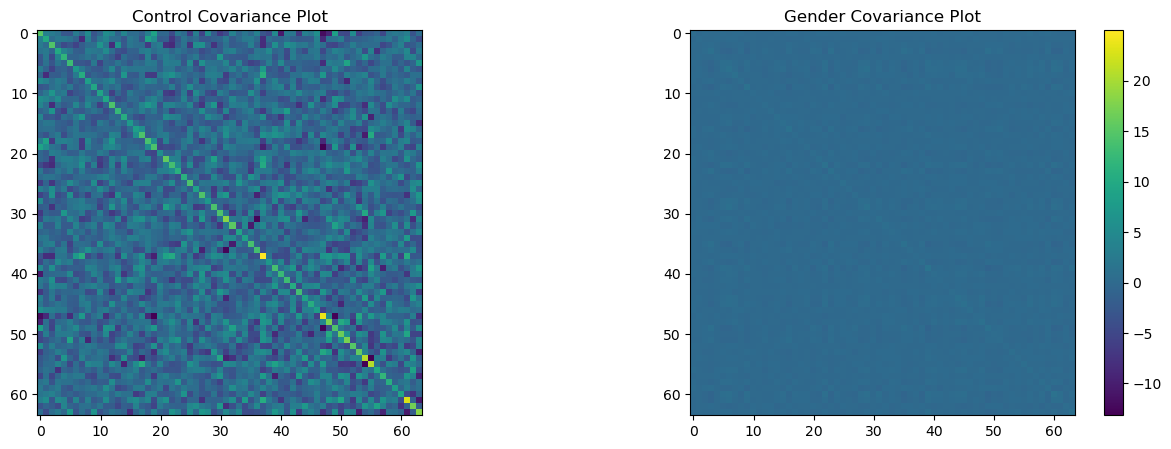

In [22]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 5))

#Calculate the minimum and maximum
vmin = min(ctrl_cov.min(), bias_cov.min())
vmax = max(ctrl_cov.max(), bias_cov.max())

plot = axs[0].imshow(ctrl_cov, vmin=vmin, vmax=vmax)
axs[0].set_title('Control Covariance Plot')

plot = axs[1].imshow(bias_cov, vmin=vmin, vmax=vmax)
axs[1].set_title('Gender Covariance Plot')
fig.colorbar(plot);

(1.1405194900353255+0j)
the ration between first eigenvalue and second eigenvalus in gender subapace is (2.6534927288288714+0j)


/Users/fengli/opt/anaconda3/envs/csci1470/lib/python3.10/site-packages/matplotlib/transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


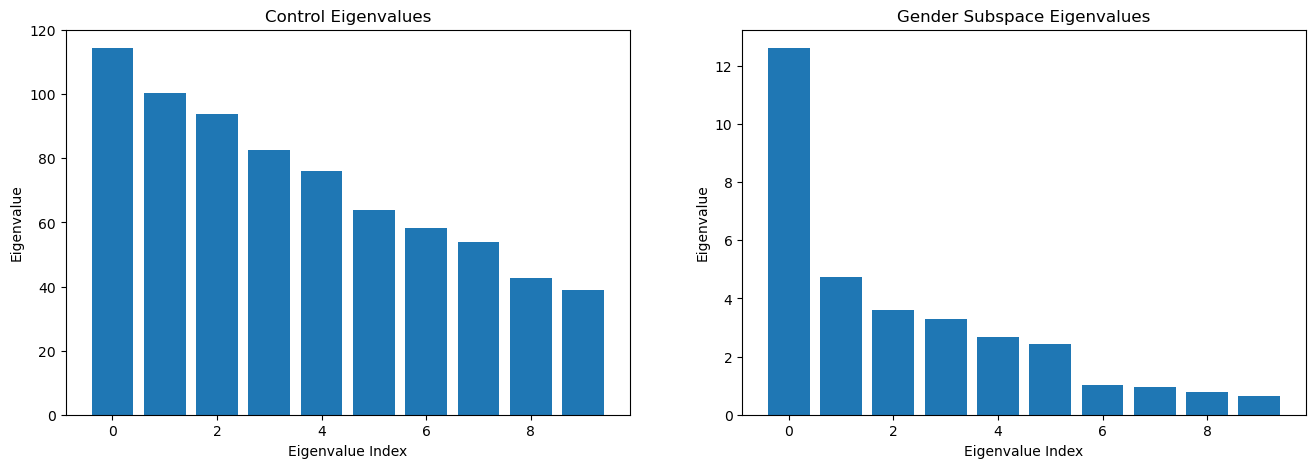

In [23]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 5))

num_eigs = 10        ## Should yeild around 10 useful eigenpairs
x = np.arange(num_eigs) 

axs[0].bar(x, sorted(ctrl_evals[:num_eigs], reverse=True))
axs[0].set_title('Control Eigenvalues')

axs[1].bar(x, sorted(bias_evals[:num_eigs], reverse=True))
axs[1].set_title('Gender Subspace Eigenvalues');
print(ctrl_evals[0]/ctrl_evals[1])
print(f'the ration between first eigenvalue and second eigenvalus in gender subapace is {bias_evals[0]/bias_evals[1]}')

for ax in axs:
    ax.set_xlabel('Eigenvalue Index')
    ax.set_ylabel('Eigenvalue')